In [1]:
import numpy as np
import sys
import math
import random
from numpy.linalg import norm

from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score


In [2]:
'''
def batch_perceptron ( X , Y , lr = 1, iterations = np.inf ):

Parameters: 
    X , Y : numpy arrays
    lr : learning rate (optional) (Default = 1)
    iterations: How long it'll run for  (optional) (Default = infinity)
    
Returns: w , delta_array , epochs
    w : array_like 
            Last updated weight 
    delta_array : array_like (list)
            An array containing all the significant deltas
    epochs : int
            Count of how many times the algorithm passed through the entire data set (iterations)
            Also represents how many times the weight changed itself
    
'''
def batch_perceptron ( X , Y , lr = 1, iterations = np.inf ):
    n = X.shape[1]
    w = np.random.uniform(low = -1, high = 1, size = (n,))
    #w = np.zeros(n)
    e = sys.float_info.epsilon

    delta = np.ones(n)

    delta_array = [ ]
    epochs = 0
    
    while ( norm(delta,1) > e):
        
        delta = np.zeros(n)
        
        for i in range(len(X)):
            
            u = w.dot(X[i])
            if Y[i] * u <= 0:
                delta = delta - ( Y[i] * X[i] )
                
                
        delta = delta/len(X)
        epochs += 1
        delta_array.append(norm(delta,1))
        w = w - (lr * delta)
            
  
        if len(delta_array) == iterations: # forcefully break due to stuck in while loop because delta
            break
            
            
    return w , delta_array , epochs

In [3]:
'''
def online_batch_perceptron ( X , Y , lr = 1, iterations = np.inf ):

Parameters: 
    X , Y : numpy arrays
    lr : learning rate (optional) (Default = 1)
    iterations: How long it'll run for  (optional) (Default = infinity)
    
Returns: w , w_steps, delta_array , epochs
    w : array_like 
            last updated weight 
    w_steps : int
            count of how many times weight updated itself
    delta_array : array_like (list)
            an array containing all the significant deltas
    epochs : int
            count of how many times the algorithm passed through the entire data set (iterations)
    
'''

def online_batch_perceptron ( X , Y , lr = 1, iterations = np.inf):
    n = X.shape[1]
    w = np.random.uniform(low = -1, high = 1, size = (n,))
    #w = np.zeros(n)
    e = sys.float_info.epsilon
   
    delta = np.ones(n)
    w_steps = 0
    
    delta_array = [ ]
    epochs = 0
    
    
    while ( norm(delta,1) > e):
        
        ChangedWeightsCheck = False
        delta = np.zeros(n)
        
        for i in range(len(X)):
            
            u = w.dot(X[i])
            if Y[i] * u <= 0:
                delta = delta - ( Y[i] * X[i] )
                delta = delta/len(X)
                
                w = w - (lr * delta)
                
                delta_array.append((norm(delta,1)))
                w_steps += 1
                ChangedWeightsCheck = True
                
                
                
        epochs += 1 
        
        if ChangedWeightsCheck == False: # forcefully break because delta has reached zero
            delta_array.append((norm(delta,1)))
            break
            
        if epochs == iterations : # forcefully break due to stuck in while loop because delta
            break
        
                
                
    return w , w_steps, delta_array , epochs

In [4]:
sign = lambda x: math.copysign(1,x)

In [5]:
# Problem 1 - Data with Bias

X = np.array([[50 , 55 , 70 , 80 , 130 , 150 , 155 , 160],
             [1 , 1 , 1 , 1 , 1 , 1 , 1 , 1]]).T

Y = np.array([1 , 1 , 1 , 1 , -1, -1 , -1 , -1])


In [6]:
# Perceptron Model
print( "Comparing Each Y predict to its counterpart of Y true \n")
w , delta , epochs  = batch_perceptron( X , Y )

y_pred = [ ]
for i in range(len(X)):
    y_pred.append( sign( w.dot(X[i]) ) ) 
    print( str(sign( w.dot(X[i]) )) + " Compared to : " + str(Y[i]))


    


Comparing Each Y predict to its counterpart of Y true 

1.0 Compared to : 1
1.0 Compared to : 1
1.0 Compared to : 1
1.0 Compared to : 1
-1.0 Compared to : -1
-1.0 Compared to : -1
-1.0 Compared to : -1
-1.0 Compared to : -1


For Batch Perceptron : Problem 1 

Epochs iterations: 2531

Number of times model weight changed 2531

Count of Significant delta changes: 2531



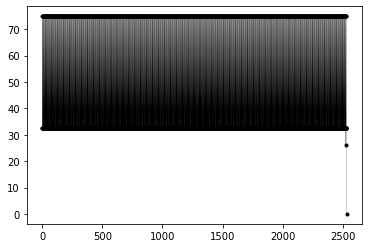

In [7]:
print("For Batch Perceptron : Problem 1 \n")
# Number of epochs
print("Epochs iterations: " + str(epochs) + "\n")
# Number of times each algorithm updated model weights 
print("Number of times model weight changed "  + str(epochs) + "\n")
# Calculating changes of delta iterations
x2 = [ ]
for i in range(len(delta)):
    x2.append( delta[i] )
    
x1 = np.arange(0,len(x2))
print("Count of Significant delta changes: "  + str(len(x2)) + "\n")
if len(x2) != 1:
    plt.plot( x1, x2 ,'.k-' , linewidth = 0.2)
else:
    print( "Delta did not change, no need for plot")

In [8]:
# Online Perceptron
print( "Comparing Each Y predict to its counterpart of Y true \n")
w , steps , delta , epochs  = online_batch_perceptron( X , Y )

y_pred = [ ]
for i in range(len(X)):
    y_pred.append( sign( w.dot(X[i]) ) ) 
    print( str(sign( w.dot(X[i]) )) + " Compared to : " + str(Y[i]))
    


    



Comparing Each Y predict to its counterpart of Y true 

1.0 Compared to : 1
1.0 Compared to : 1
1.0 Compared to : 1
1.0 Compared to : 1
-1.0 Compared to : -1
-1.0 Compared to : -1
-1.0 Compared to : -1
-1.0 Compared to : -1


For Online Perceptron : Problem 1 

Epochs iterations: 84

Number of times model weight changed: 255

Count of Significant delta changes: 256



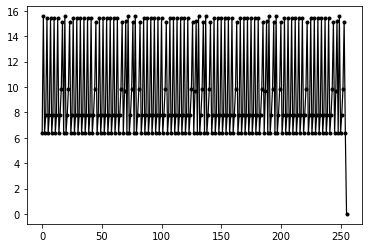

In [9]:
print("For Online Perceptron : Problem 1 \n")
# Number of epochs
print("Epochs iterations: " + str(epochs) + "\n")
# Number of times each algorithm updated model weights 
print("Number of times model weight changed: " + str(steps) + "\n")
# Calculating changes of delta iterations
x2 = [ ]
for i in range(len(delta)):
    x2.append( delta[i]  )
    
x1 = np.arange(0,len(x2))
print("Count of Significant delta changes: "  + str(len(x2)) + "\n")
if len(x2) != 1:
    plt.plot( x1, x2 ,'.k-' , linewidth = 1.2)
else:
    print( "Delta did not change, no need for plot")

In [10]:
# Problem 4 - Data with Bias

X = np.array([[ 0 , 255 ,  0  ,  0  , 255  ,  0  ,  255  , 255  ],
              [ 0 ,  0  , 255 ,  0  , 255  , 255 ,   0   , 255  ],
              [ 0 ,  0  ,  0  , 255 ,  0   , 255 ,  255  , 255  ],
              [ 1 ,  1  ,  1  ,  1  ,  1   ,  1  ,   1   ,  1   ]]).T


Y = np.array([1 , 1 , 1 , -1 , 1 , -1 , -1 , 1])



In [11]:
# Perceptron Model
print( "Comparing Each Y predict to its counterpart of Y true \n")
w , delta , epochs  = batch_perceptron( X , Y )

y_pred = [ ]
for i in range(len(X)):
    y_pred.append( sign( w.dot(X[i]) ) ) 
    print( str(sign( w.dot(X[i]) )) + " Compared to : " + str(Y[i]))

Comparing Each Y predict to its counterpart of Y true 

1.0 Compared to : 1
1.0 Compared to : 1
1.0 Compared to : 1
-1.0 Compared to : -1
1.0 Compared to : 1
-1.0 Compared to : -1
-1.0 Compared to : -1
1.0 Compared to : 1


For Batch Perceptron : Problem 4 

Epochs iterations: 8

Number of times model weight changed: 8

Count of Significant delta changes: 8



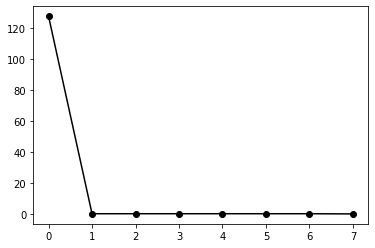

In [12]:
print("For Batch Perceptron : Problem 4 \n")
# Number of epochs
print("Epochs iterations: " + str(epochs) + "\n")
# Number of times each algorithm updated model weights 
print("Number of times model weight changed: "  + str(epochs) + "\n")
# Calculating changes of delta iterations
x2 = [ ]
for i in range(len(delta)):
    x2.append( delta[i]  )
    
x1 = np.arange(0,len(x2))
print("Count of Significant delta changes: "  + str(len(x2)) + "\n")
if len(x2) != 1:
    plt.plot( x1, x2 ,'ok-' , linewidth = 1.5)
else:
    print( "Delta did not change, no need for plot")

In [13]:
# Online Perceptron
print( "Comparing Each Y predict to its counterpart of Y true \n")
w , steps , delta , epochs  = online_batch_perceptron( X , Y )

y_pred = [ ]
for i in range(len(X)):
    y_pred.append( sign( w.dot(X[i]) ) ) 
    print( str(sign( w.dot(X[i]) )) + " Compared to : " + str(Y[i]))

Comparing Each Y predict to its counterpart of Y true 

1.0 Compared to : 1
1.0 Compared to : 1
1.0 Compared to : 1
-1.0 Compared to : -1
1.0 Compared to : 1
-1.0 Compared to : -1
-1.0 Compared to : -1
1.0 Compared to : 1


For Online Perceptron : Problem 4 

Epochs iterations: 8

Number of times model weight changed: 15

Count of Significant delta changes: 16



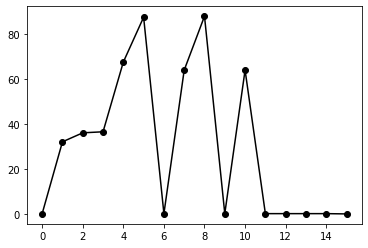

In [14]:
print("For Online Perceptron : Problem 4 \n")
# Number of epochs
print("Epochs iterations: " + str(epochs) + "\n")
# Number of times each algorithm updated model weights 
print("Number of times model weight changed: " + str(steps) + "\n")
# Calculating changes of delta iterations
x2 = [ ]
for i in range(len(delta)):
    x2.append( delta[i]  )
    
x1 = np.arange(0,len(x2))
print("Count of Significant delta changes: "  + str(len(x2)) + "\n")
if len(x2) != 1:
    plt.plot( x1, x2 ,'ok-' , linewidth = 1.5)
else:
    print( "Delta did not change, no need for plot")

In [15]:
# RANDOM DATA SECTION

Possible Model Accuracy :  1.0


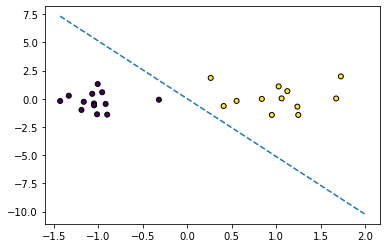

In [16]:
# Perceptron Model of Random Data

x , y = make_classification(25 , n_features=2 , n_redundant = 0,
                            n_informative = 1, n_clusters_per_class = 1)

x_stored = x # for some reason x "is broken" after the split code

mask_for_y = y == 0
y[mask_for_y] = - 1

plt.scatter(x[:,0],x[:,1],marker='o',c=y,s=25,edgecolor='k')

X_train, X_test, Y_train, Y_test = train_test_split(
x, y, test_size = 0.25 , train_size = 0.75)

w , delta , epochs  = batch_perceptron( X_train , Y_train , iterations = 50)

y_pred = [ ]
for x in X_test:
    y_pred.append( sign( w.dot(x) ) ) 
    
accuracy = accuracy_score(Y_test, y_pred)
print("Possible Model Accuracy : ",accuracy)

# Explaination:  x1w1 = -x2w2 , therefore x2 = x1*(w1/-w2)

x1 = np.linspace(X_train.min() , X_train.max())
x2 = x1 * (w[0]/-w[1])



plt.plot(  x1 , x2 , ls = '--' , linewidth = 1.5)

For Batch Perceptron : 

Epochs iterations: 2

Number of times model weight changed: 2

Count of Significant delta changes: 2



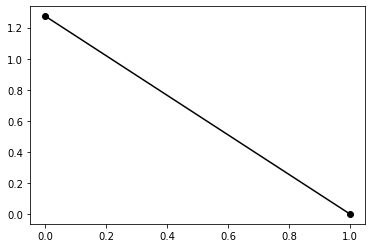

In [17]:
print("For Batch Perceptron : \n")
# Number of epochs
print("Epochs iterations: " + str(epochs) + "\n")
# Number of times each algorithm updated model weights 
print("Number of times model weight changed: " + str(epochs) + "\n")
# Calculating changes of delta iterations
x2 = [ ]
for i in range(len(delta)):
    x2.append( delta[i]  )
    
x1 = np.arange(0,len(x2))
print("Count of Significant delta changes: "  + str(len(x2)) + "\n")
if len(x2) != 1:
    plt.plot( x1, x2 ,'ok-' , linewidth = 1.5)
else:
    print( "Delta did not change, no need for plot")


Possible Model Accuracy :  1.0


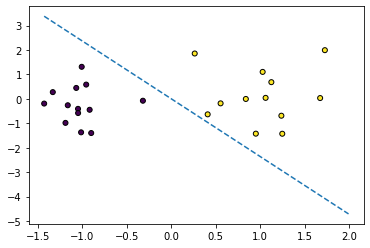

In [18]:
# Online Perceptron

plt.scatter(x_stored[:,0],x_stored[:,1],marker='o',c=y,s=25,edgecolor='k')
w , steps , delta , epochs  = online_batch_perceptron( X_train , Y_train , iterations = 50)

y_pred = [ ]
for x in X_test:
    y_pred.append( sign( w.dot(x) ) ) 
    
accuracy = accuracy_score(Y_test, y_pred)
print("Possible Model Accuracy : ",accuracy)

# Explaination:  x1w1 = -x2w2 , therefore x2 = x1*(w1/-w2)

x1 = np.linspace(X_train.min() , X_train.max())
x2 = x1 * (w[0]/-w[1])

plt.plot(  x1 , x2 , ls = '--' , linewidth = 1.5)

For Online Perceptron : 

Epochs iterations: 3

Number of times model weight changed: 9

Count of Significant delta changes: 10



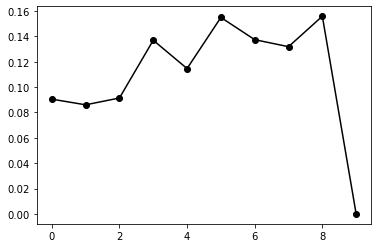

In [19]:
print("For Online Perceptron : \n")
# Number of epochs
print("Epochs iterations: " + str(epochs) + "\n")
# Number of times each algorithm updated model weights 
print("Number of times model weight changed: " + str(steps) + "\n")
# Calculating changes of delta iterations
x2 = [ ]

for i in range(len(delta)):
    x2.append( delta[i]  )

    
x1 = np.arange(0,len(x2))
print("Count of Significant delta changes: "  + str(len(x2)) + "\n")
if len(x2) != 1:
    plt.plot( x1, x2 ,'ok-' , linewidth = 1.5)
else:
    print( "Delta did not change, no need for plot")
